In [21]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

#https://anaconda.org/conda-forge/hdbscan

In [12]:
#Cargamos el dataframe
df_cluster_hdbscan = np.load('/content/clusterable_data.npy')

In [13]:
#Instanciamos el algoritmo
hdbscan = HDBSCAN(min_cluster_size=20,
                 min_samples=10)
                 
#Entrenamos y predecimos
preds = hdbscan.fit_predict(df_cluster_hdbscan)

In [14]:
#Convertimos en dataframe para poder graficar!
df_cluster_hdbscan = pd.DataFrame(df_cluster_hdbscan)
df_cluster_hdbscan.head()

,0,1
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


In [15]:
#Renombramos las columnas!
df_cluster_hdbscan = df_cluster_hdbscan.rename(columns={0:'x',
                                                       1:'y'})
df_cluster_hdbscan.columns

Index(['x', 'y'], dtype='object')

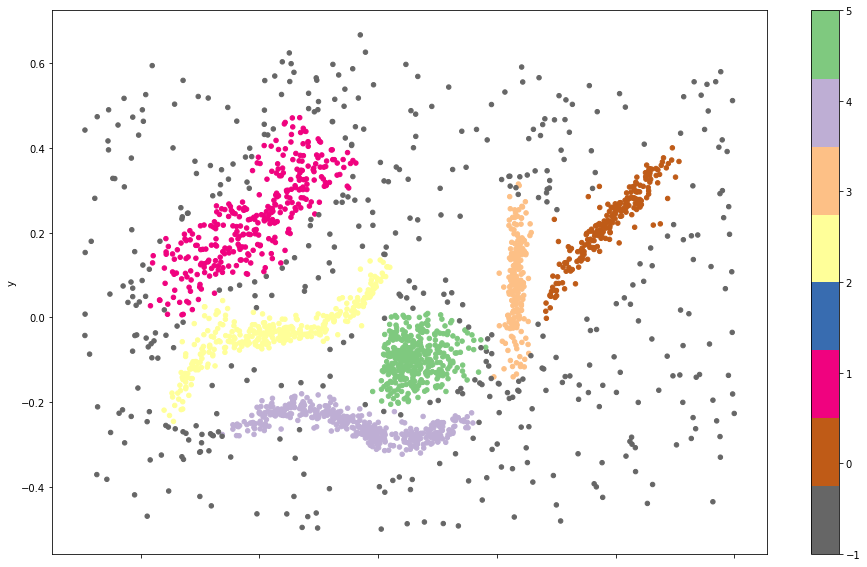

In [16]:
#Graficamos
df_cluster_hdbscan.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))

# Conclusiones

En base a la visualización anterior, nuestro algoritmo nos ha creado seis clusters y nos ha detectado el ruido del dataset (puntos grises).

In [4]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340290 sha256=c9a3647bc1350659e70f5a003b5a9023c009c5bbdb75d9524d774ea1e11fa65f
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [18]:
#Generamos nuestra x
X = df_cluster_hdbscan

kmeans.inertia 244.86495201459024 del cluster 1
kmeans.inertia 150.3137573471294 del cluster 2
kmeans.inertia 85.10289788476044 del cluster 3
kmeans.inertia 61.42481565730522 del cluster 4
kmeans.inertia 51.59595717005991 del cluster 5
kmeans.inertia 43.133244289727 del cluster 6
kmeans.inertia 36.56390248054564 del cluster 7
kmeans.inertia 31.336711778248606 del cluster 8
kmeans.inertia 27.584143078305484 del cluster 9
kmeans.inertia 24.610288661241114 del cluster 10


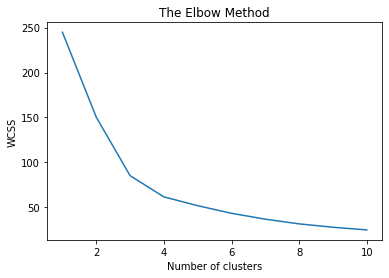

In [22]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    print("kmeans.inertia {0} del cluster {1}".format(kmeans.inertia_,i))
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Creando el k-Means para los 5 grupos encontrados
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

In [26]:
X[]

,x,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075
...,...,...
2304,-0.063610,0.013804
2305,0.284742,0.301998
2306,0.502431,-0.300296
2307,0.538223,0.194122


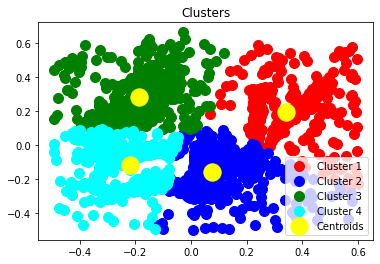

In [33]:
plt.scatter(X.loc[y_kmeans == 0, 'x'], X.loc[y_kmeans == 0, 'y'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.loc[y_kmeans == 1, 'x'], X.loc[y_kmeans == 1,'y'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.loc[y_kmeans == 2, 'x'], X.loc[y_kmeans == 2, 'y'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.loc[y_kmeans == 3, 'x'], X.loc[y_kmeans == 3, 'y'], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters')
plt.legend()
plt.show()